[*********************100%%**********************]  4 of 4 completed


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


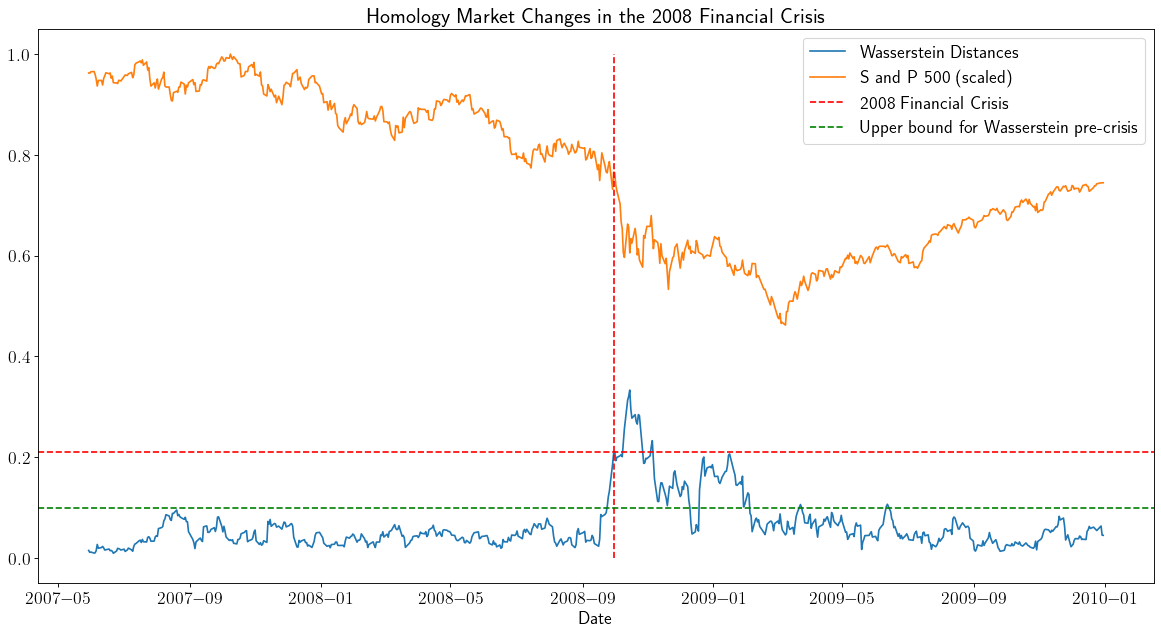

In [3]:
import yfinance as yf
import numpy as np
from ripser import Rips
import persim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Seeing into the past
index_names = ['^GSPC', '^DJI', '^IXIC', '^RUT']
start_date_string = "2007-04-01"
end_date_string = "2009-12-31"
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

# keep only adjusted closing prices
df_close = raw_data['Adj Close'].dropna(axis='rows')

P = df_close.to_numpy()

# define array of log-returns as the
# log of the ratio between closing values of two adjacent days
r = np.log(np.divide(P[1:], P[:len(P)-1]))

# Create an instance of the Vietoris-Rips Solver
rips = Rips(maxdim = 2)

# some parameters
w = 20 # time window size
n = len(raw_data)-(2*w) # number of time segments that fit in the data
wasserstein_dists = np.zeros((n, 1)) # initialise array for Wasserstein distances (w-dists)

# commute w-dists between persistence diagrams for adjacent time windows
for i in range(n): # when i = 0, for example

    # compute persistence diagrams for adjacent time windows
    dgm1 = rips.fit_transform(r[i:i+w]) # e.g. r[0:20], so 0th to 19th columns of r
    dgm2 = rips.fit_transform(r[i+w:i+2*w]) # e.g.: r[20: 40], so 20th to 39th columns of r

    # compute w-distance between diagrams
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False) # e.g. 0th column of wasserstein_dists

# plot w-dists over time

plt.figure(figsize=(18, 9), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[2*w:n+2*w], wasserstein_dists) # e.g. plotting 40th day of data against the 0th column of the wasserstein_dists array
plt.plot(raw_data.index[2*w:n+2*w], df_close.iloc[2*w:n+2*w, 0]/max(df_close.iloc[2*w:n+2*w, 0]))
plt.plot([raw_data.index[378], raw_data.index[378]], [0, 1], 'r--') # This is the vertical dotted line showing the biggest drop in the S&P 500 during the 2008 financial crisis.
plt.axhline(y=0.1, color='g', linestyle='--')
plt.axhline(y=0.21, color='r', linestyle='--')
plt.legend(['Wasserstein Distances', 'S and P 500 (scaled)', '2008 Financial Crisis', 'Upper bound for Wasserstein pre-crisis'])
plt.xlabel('Date')
plt.title('Homology Market Changes in the 2008 Financial Crisis')

plt.show()

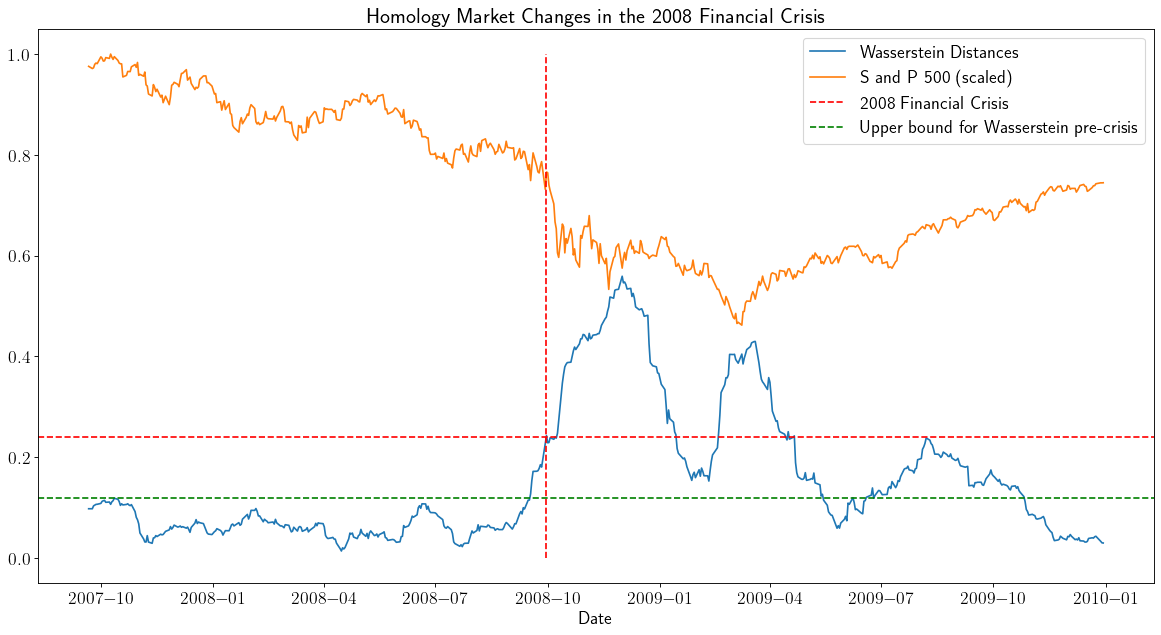

In [4]:
w = 60
n = len(raw_data)-(2*w)
wasserstein_dists = np.zeros((n, 1))

for i in range(n):

    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w:i+2*w])
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)

plt.figure(figsize=(18, 9), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[2*w:n+2*w], wasserstein_dists)
plt.plot(raw_data.index[2*w:n+2*w], df_close.iloc[2*w:n+2*w, 0]
         /max(df_close.iloc[2*w:n+2*w, 0]))
plt.plot([raw_data.index[378], raw_data.index[378]], [0, 1], 'r--')
plt.axhline(y=0.12, color='g', linestyle='--')
plt.axhline(y=0.24, color='r', linestyle='--')
plt.legend(['Wasserstein Distances', 'S and P 500 (scaled)',
            '2008 Financial Crisis', 'Upper bound for Wasserstein pre-crisis'])
plt.xlabel('Date')
plt.title('Homology Market Changes in the 2008 Financial Crisis')

plt.show()

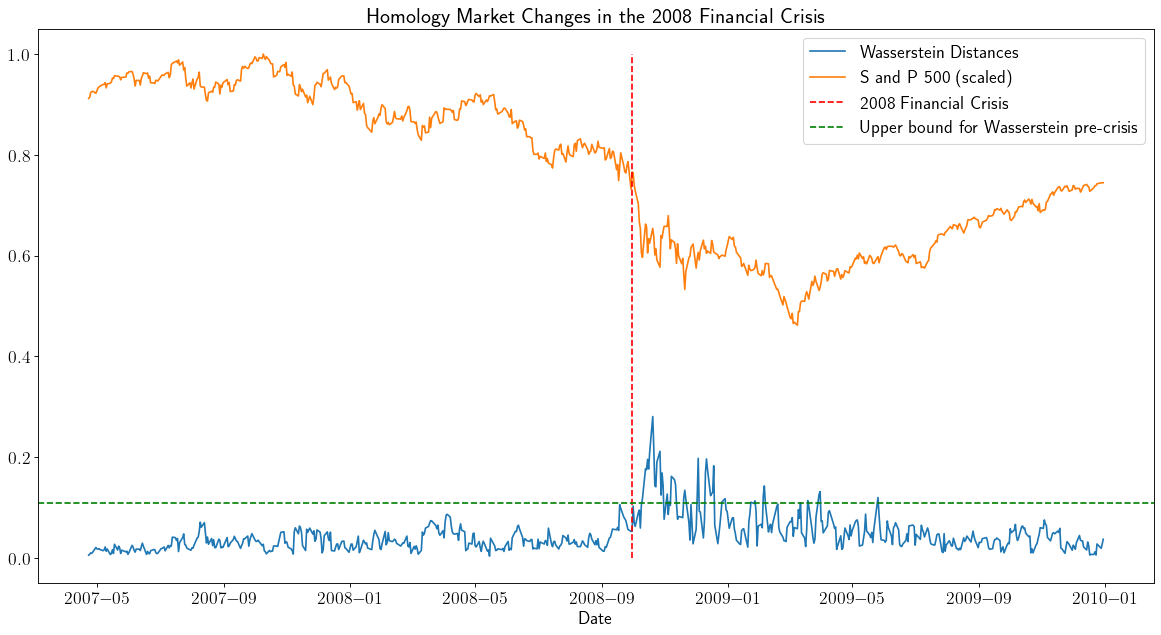

In [5]:
w = 7
n = len(raw_data)-(2*w)
wasserstein_dists = np.zeros((n, 1))

for i in range(n):

    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w:i+2*w])

    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)

plt.figure(figsize=(18, 9), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[2*w:n+2*w], wasserstein_dists)
plt.plot(raw_data.index[2*w:n+2*w], df_close.iloc[2*w:n+2*w, 0]/
         max(df_close.iloc[2*w:n+2*w, 0]))
plt.plot([raw_data.index[378], raw_data.index[378]], [0, 1], 'r--')
plt.axhline(y=0.11, color='g', linestyle='--')
plt.legend(['Wasserstein Distances', 'S and P 500 (scaled)',
            '2008 Financial Crisis', 'Upper bound for Wasserstein pre-crisis'])
plt.xlabel('Date')
plt.title('Homology Market Changes in the 2008 Financial Crisis')

plt.show()

[*********************100%%**********************]  6 of 6 completed


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


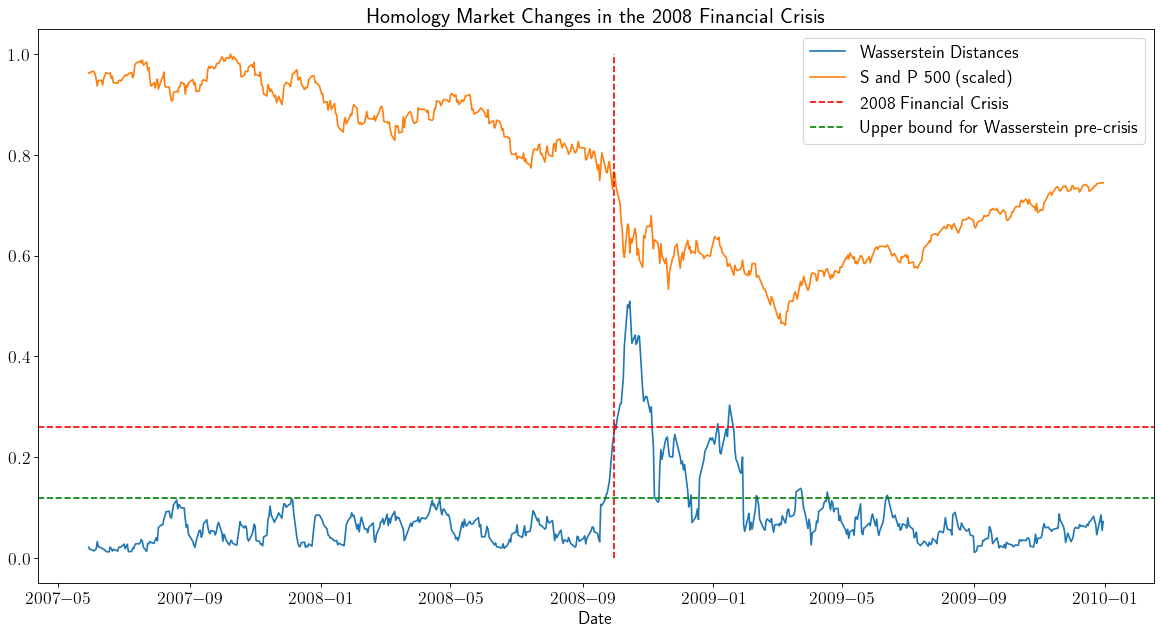

In [6]:
index_names = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^NYA', '^XAX']
start_date_string = "2007-04-01"
end_date_string = "2009-12-31"
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

df_close = raw_data['Adj Close'].dropna(axis='rows')

P = df_close.to_numpy()
r = np.log(np.divide(P[1:], P[:len(P)-1]))

rips = Rips(maxdim = 2)

w = 20
n = len(raw_data)-(2*w)
wasserstein_dists = np.zeros((n, 1))

for i in range(n):

    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w:i+2*w])
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)

plt.figure(figsize=(18, 9), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[2*w:n+2*w], wasserstein_dists)
plt.plot(raw_data.index[2*w:n+2*w], df_close.iloc[2*w:n+2*w, 0]
         /max(df_close.iloc[2*w:n+2*w, 0]))
plt.plot([raw_data.index[378], raw_data.index[378]], [0, 1], 'r--')
plt.axhline(y=0.12, color='g', linestyle='--')
plt.axhline(y=0.26, color='r', linestyle='--')
plt.legend(['Wasserstein Distances', 'S and P 500 (scaled)',
            '2008 Financial Crisis', 'Upper bound for Wasserstein pre-crisis'])
plt.xlabel('Date')
plt.title('Homology Market Changes in the 2008 Financial Crisis')

plt.show()